<a href="https://colab.research.google.com/github/hariharan-075/ML/blob/main/2420080075_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

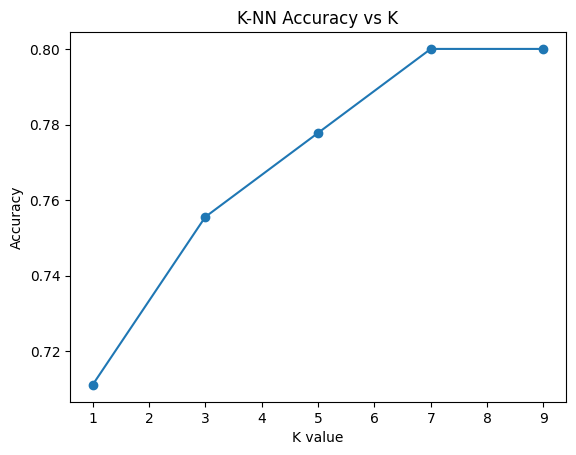

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X_iris = iris.data[:, :2]
y_iris = iris.target

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42
)

k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_i, y_train_i)
    accuracies.append(accuracy_score(y_test_i, knn.predict(X_test_i)))

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K-NN Accuracy vs K")
plt.show()


In [ ]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_manhattan.fit(X_train_i, y_train_i)
print("Manhattan Accuracy:",
      accuracy_score(y_test_i, knn_manhattan.predict(X_test_i)))


Manhattan Accuracy: 0.8


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_i, y_train_i)
y_pred_gnb = gnb.predict(X_test_i)

print("Gaussian NB Accuracy:",
      accuracy_score(y_test_i, y_pred_gnb))


Gaussian NB Accuracy: 0.8222222222222222


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep="\t", names=["label", "message"])

X_sms = data["message"]
y_sms = data["label"]

vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X_sms)

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_vec, y_sms, test_size=0.3, random_state=42
)

mnb = MultinomialNB(alpha=1.0)
mnb.fit(X_train_s, y_train_s)

y_pred = mnb.predict(X_test_s)

print("Multinomial NB Accuracy:", accuracy_score(y_test_s, y_pred))
print(classification_report(y_test_s, y_pred))
print("Probabilities:\n", mnb.predict_proba(X_test_s[:5]))


Multinomial NB Accuracy: 0.9850478468899522
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1448
        spam       0.93      0.96      0.95       224

    accuracy                           0.99      1672
   macro avg       0.96      0.97      0.97      1672
weighted avg       0.99      0.99      0.99      1672

Probabilities:
 [[9.99999940e-01 6.02572593e-08]
 [9.99999984e-01 1.62997961e-08]
 [1.00000000e+00 7.12334851e-12]
 [9.99999281e-01 7.18904532e-07]
 [9.99994573e-01 5.42713919e-06]]


In [ ]:
knn_weighted = KNeighborsClassifier(n_neighbors=5, weights="distance")
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()


In [ ]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ("knn", KNeighborsClassifier(n_neighbors=5)),
        ("nb", MultinomialNB())
    ],
    voting="hard"
)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors": [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_i, y_train_i)

print("Best K:", grid.best_params_)


Best K: {'n_neighbors': 9}
